# [b]Anova Analise de variancia[/b]

In [1]:
import pandas as pd

arquivo1 = pd.ExcelFile('filosofiadaANOVA.xlsx')
dados1 = pd.read_excel(arquivo1,'exp1')
dados2 = pd.read_excel(arquivo1,'exp2')
dados3 = pd.read_excel(arquivo1,'exp3')
dados4 = pd.read_excel(arquivo1,'exp4')
dados5 = pd.read_excel(arquivo1,'exp5')
dados6 = pd.read_excel(arquivo1,'exp6')



In [2]:
dados1.describe()

,agua,suco,café
count,5.000000,5.000000,5.000000
mean,20.000000,21.000000,20.800000
std,10.488088,10.559356,10.401923
min,10.000000,11.000000,12.000000
25%,12.000000,14.000000,13.000000
50%,18.000000,19.000000,17.000000
75%,24.000000,23.000000,25.000000
max,36.000000,38.000000,37.000000


In [3]:
dados2.describe()

,agua,suco,café
count,5.0,5.000000,5.000000
mean,30.0,18.600000,11.600000
std,1.0,1.140175,1.140175
min,29.0,17.000000,10.000000
25%,29.0,18.000000,11.000000
50%,30.0,19.000000,12.000000
75%,31.0,19.000000,12.000000
max,31.0,20.000000,13.000000


In [4]:
dados3.describe()

,agua,suco,café
count,5.0,5.000000,5.00000
mean,30.0,28.600000,27.60000
std,1.0,1.140175,1.67332
min,29.0,27.000000,25.00000
25%,29.0,28.000000,27.00000
50%,30.0,29.000000,28.00000
75%,31.0,29.000000,29.00000
max,31.0,30.000000,29.00000


In [5]:
dados4.describe()

,água,suco,café
count,10.000000,10.000000,10.00000
mean,31.600000,29.300000,27.10000
std,1.505545,1.494434,1.66333
min,30.000000,27.000000,25.00000
25%,31.000000,28.250000,26.00000
50%,31.000000,29.000000,27.00000
75%,32.000000,30.000000,28.00000
max,35.000000,32.000000,30.00000


In [6]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
agua    5 non-null int64
suco    5 non-null int64
café    5 non-null int64
dtypes: int64(3)
memory usage: 200.0 bytes


In [7]:
#teste de normalidade shapiro wilk

#se o valor de p(segundo valor) > alfa(0,5), aceitamos h0 a amostra vem de uma distribuição normal

import scipy.stats as stats

stats.shapiro(dados1['agua'])

(0.9252474904060364, 0.5643397569656372)

In [8]:
stats.shapiro(dados1['suco'])

(0.907430112361908, 0.45230212807655334)

In [9]:
stats.shapiro(dados1['café'])

(0.8796901702880859, 0.3079093098640442)

In [10]:
#separando os objetos gerados
valor , pvalue = stats.shapiro(dados1['agua'])

valor

0.9252474904060364

In [11]:
pvalue1 = round(pvalue,3)
pvalue1

0.564

In [12]:
#testar levene - testar se as variancias sao semelhantes
# se o valor de p > alfa, aceitamos h0= as amostras tem variancia semelhantes

levene = stats.levene(dados1['agua'],dados1['suco'],dados1['café'])

levene

LeveneResult(statistic=0.003939592908732753, pvalue=0.9960694448246677)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.set(style="whitegrid", color_codes=True)
 
sns.boxplot(data=dados1);

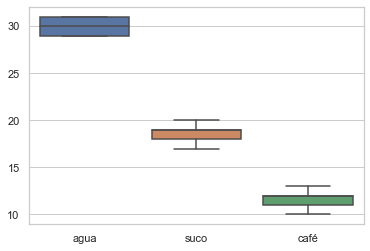

In [14]:
sns.set(style="whitegrid", color_codes=True)
 
sns.boxplot(data=dados2);

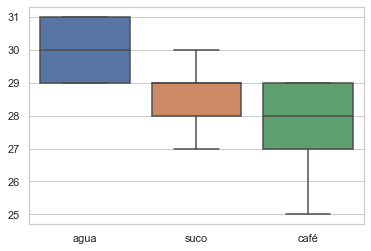

In [15]:
sns.set(style="whitegrid", color_codes=True)
 
sns.boxplot(data=dados3);

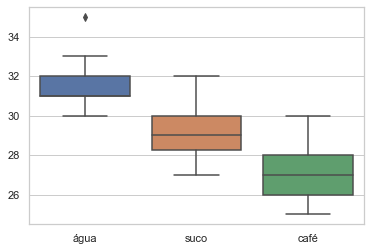

In [16]:
sns.set(style="whitegrid", color_codes=True)
 
sns.boxplot(data=dados4);

# Anova - one way

In [17]:
from scipy import stats 
F,p=stats.f_oneway(dados1['agua'],dados1['suco'],dados1['café'])

p

0.9873552754883261

In [18]:
if p> 0.05:
    print('Não existe diferença entre os tratamentos')
else:
    print('Existe Diferença nos tratamentos')

Não existe diferença entre os tratamentos


In [19]:
F2,p2=stats.f_oneway(dados2['agua'],dados2['suco'],dados2['café'])

if p2> 0.05:
    print('Não existe diferença entre os tratamentos')
else:
    print('Existe Diferença nos tratamentos')


Existe Diferença nos tratamentos


In [20]:
F3,p3=stats.f_oneway(dados2['agua'],dados2['suco'],dados2['café'])

if p3> 0.05:
    print('Não existe diferença entre os tratamentos')
else:
    print('Existe Diferença nos tratamentos')

Existe Diferença nos tratamentos


In [21]:
F3,p3=stats.f_oneway(dados2['agua'],dados2['suco'],dados2['café'])

if p3> 0.05:
    print('Não existe diferença entre os tratamentos')
else:
    print('Existe Diferença nos tratamentos')

Existe Diferença nos tratamentos


In [22]:
F4,p4=stats.f_oneway(dados2['agua'],dados2['suco'],dados2['café'])

if p4> 0.05:
    print('Não existe diferença entre os tratamentos')
else:
    print('Existe Diferença nos tratamentos')

Existe Diferença nos tratamentos


# Mostrar quadro da anova

In [23]:
import statsmodels.api as sm

from statsmodels.formula.api import ols

dados5.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
bebida,agua,agua,agua,agua,agua,suco,suco,suco,suco,suco,café,café,café,café,café
reação,29,30,31,31,29,28,29,27,30,29,25,28,29,27,29


In [24]:
modelo = ols('reação ~ bebida', data = dados5).fit()

aov_table = sm.stats.anova_lm(modelo,typ=1)

aov_table


,df,sum_sq,mean_sq,F,PR(>F)
bebida,2.0,14.533333,7.266667,4.27451,0.039659
Residual,12.0,20.400000,1.700000,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
agua,café,-2.4,0.0324,-4.5989,-0.2011,True
agua,suco,-1.4,0.2457,-3.5989,0.7989,False
café,suco,1.0,0.4699,-1.1989,3.1989,False


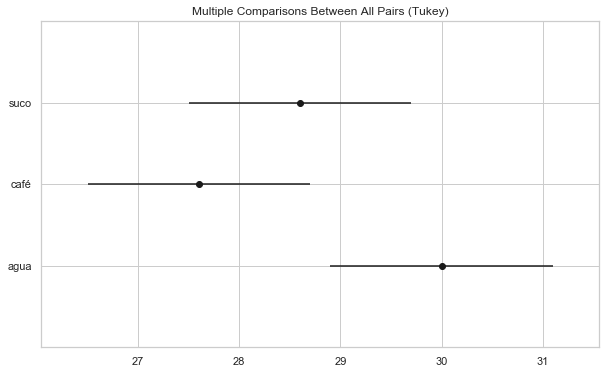

In [25]:
# Testes post hoc 'apos o fato'

import statsmodels.stats.multicomp as multi
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

comparacao = multi.MultiComparison(dados5['reação'],dados5['bebida'])

resposta = comparacao.tukeyhsd(0.05)

resposta.plot_simultaneous()

plt.vlines(x=50,ymin=-0.5,ymax=4.5,color='r')

resposta.summary()


# Fatorial - 2 way anova

In [26]:
equação ='reação ~ C(periodo)+C(bebida)+C(periodo):C(bebida)'

# nesse modulo sem C = colunas , : para indicar interações

modelo1 = ols(equação,dados6).fit()
aov_table=sm.stats.anova_lm(modelo1,typ=2)

aov_table


,sum_sq,df,F,PR(>F)
C(periodo),4.559890,1.0,1.618098,0.215545
C(bebida),91.877062,2.0,16.301499,0.000034
C(periodo):C(bebida),3.822938,2.0,0.678294,0.516946
Residual,67.633333,24.0,NaN,NaN


# Tukey

In [27]:
dados6['grupo'] = dados6['periodo']+'-'+dados6['bebida']

dados6

,periodo,bebida,reação,grupo
0,dia,agua,30,dia-agua
1,dia,agua,31,dia-agua
2,dia,agua,31,dia-agua
3,dia,agua,32,dia-agua
4,dia,agua,32,dia-agua
5,noite,agua,31,noite-agua
6,noite,agua,31,noite-agua
7,noite,agua,33,noite-agua
8,noite,agua,35,noite-agua
9,noite,agua,30,noite-agua


group1,group2,meandiff,p-adj,lower,upper,reject
dia-agua,dia-café,-4.6,0.0028,-7.8829,-1.3171,True
dia-agua,dia-suco,-2.0,0.4372,-5.2829,1.2829,False
dia-agua,noite-agua,0.8,0.9,-2.4829,4.0829,False
dia-agua,noite-café,-3.0333,0.063,-6.1764,0.1098,False
dia-agua,noite-suco,-2.2,0.3978,-5.682,1.282,False
dia-café,dia-suco,2.6,0.1795,-0.6829,5.8829,False
dia-café,noite-agua,5.4,0.001,2.1171,8.6829,True
dia-café,noite-café,1.5667,0.6259,-1.5764,4.7098,False
dia-café,noite-suco,2.4,0.3056,-1.082,5.882,False
dia-suco,noite-agua,2.8,0.1263,-0.4829,6.0829,False


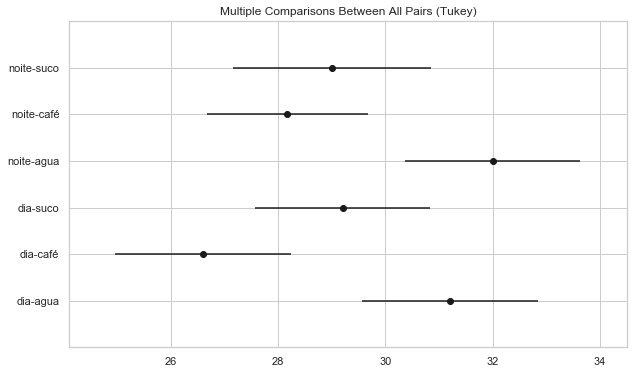

In [28]:
comparacao = multi.MultiComparison(dados6['reação'],dados6['grupo'])

resposta = comparacao.tukeyhsd(0.05)

resposta.plot_simultaneous()

plt.vlines(x=50,ymin=-0.5,ymax=4.5,color='r')

resposta.summary()